In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = pd.read_pickle('treino.pkl.gz')

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20, 8)

In [3]:
print(df['emprego'].isnull().value_counts())

df['emprego'].unique()

False    180376
True       6147
Name: emprego, dtype: int64


array(['Salaried', 'Self employed', nan], dtype=object)

In [4]:
# eliminarei nans, para esta análise
# em seguida, divido dados de acordo com possíveis valores de 'emprego'

df = df.loc[df['emprego'].isnull() == False]
sal = df.loc[df['emprego'] == 'Salaried']
sel = df.loc[df['emprego'] == 'Self employed']

In [5]:
print('dados cujo emprego é "Salaried":', len(sal))
print('       //       "Self employed":', len(sel))
print('')
print('proporção de dados cujo emprego é "Salaried":', round(len(sal) / len(df) * 100, 2), '%')
print('             //              "Self employed":', round(len(sel) / len(df) * 100, 2), '%')
print('')
print('proporção de "default", dos dados de "sal":', round(sal['default'].value_counts(1).iloc[1] * 100, 2),'%')
print('                //                   "sel":', round(sel['default'].value_counts(1).iloc[1] * 100, 2),'%')

dados cujo emprego é "Salaried": 78348
       //       "Self employed": 102028

proporção de dados cujo emprego é "Salaried": 43.44 %
             //              "Self employed": 56.56 %

proporção de "default", dos dados de "sal": 20.33 %
                //                   "sel": 22.68 %


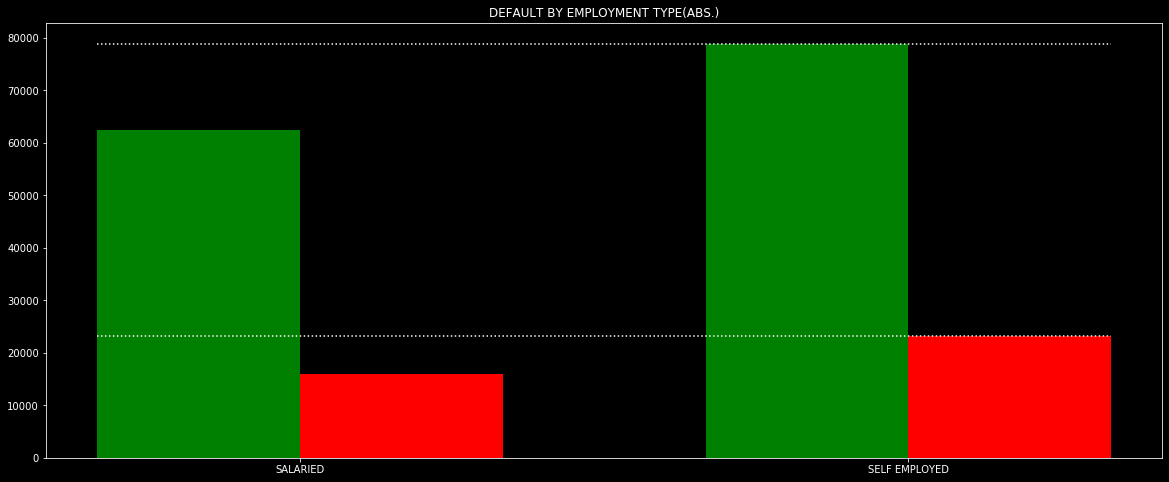

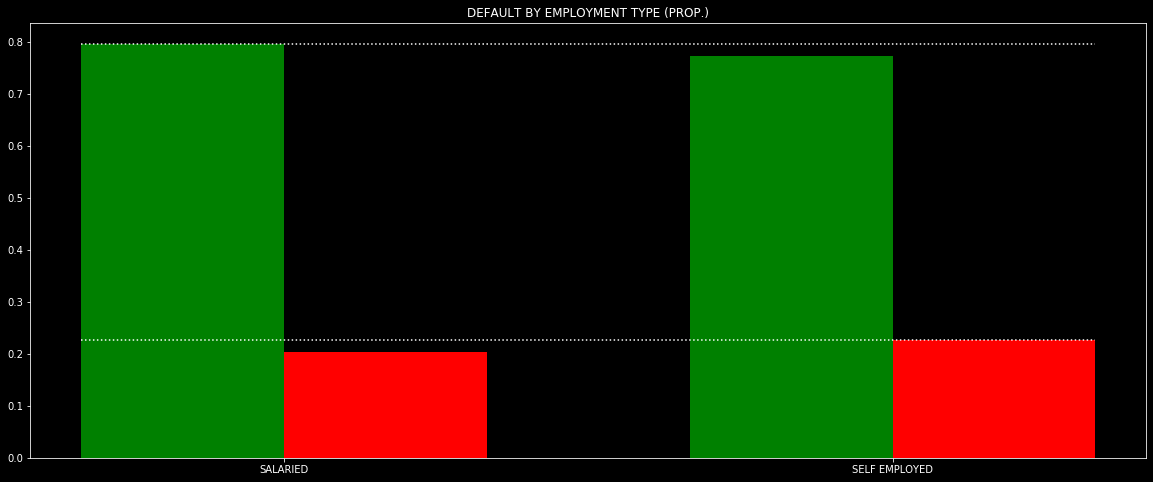

In [6]:
plt.bar([0], [len(sal.loc[sal['default'] == 0])], width = 0.5, color = 'green')
plt.bar([0.5], [len(sal.loc[sal['default'] == 1])], width = 0.5, color = 'red')

plt.bar([1.5], [len(sel.loc[sel['default'] == 0])], width = 0.5, color = 'green')
plt.bar([2], [len(sel.loc[sel['default'] == 1])], width = 0.5, color = 'red')

plt.plot([-0.25, 2.25], [len(sel.loc[sel['default'] == 1]),
                         len(sel.loc[sel['default'] == 1])], ls = ':', color = 'white')

plt.plot([-0.25, 2.25], [len(sel.loc[sel['default'] == 0]),
                         len(sel.loc[sel['default'] == 0])], ls = ':', color = 'white')

plt.xticks([0.25, 1.75], ['SALARIED', 'SELF EMPLOYED'])
plt.title('DEFAULT BY EMPLOYMENT TYPE(ABS.)')
plt.show()

plt.bar([0], [sal['default'].value_counts(1)[0]], width = 0.5, color = 'green')
plt.bar([0.5], [sal['default'].value_counts(1)[1]], width = 0.5, color = 'red')

plt.bar([1.5], [sel['default'].value_counts(1)[0]], width = 0.5, color = 'green')
plt.bar([2], [sel['default'].value_counts(1)[1]], width = 0.5, color = 'red')

plt.plot([-0.25, 2.25], [sal['default'].value_counts(1)[0],
                         sal['default'].value_counts(1)[0]], ls = ':', color = 'white')

plt.plot([-0.25, 2.25], [sel['default'].value_counts(1)[1],
                         sel['default'].value_counts(1)[1]], ls = ':', color = 'white')

plt.xticks([0.25, 1.75], ['SALARIED', 'SELF EMPLOYED'])
plt.title('DEFAULT BY EMPLOYMENT TYPE (PROP.)')
plt.show()

In [7]:
# pessoas 'Self employed' caem em 'default' com uma frequência levemente mais alta

In [8]:
# chi2_contingency
est, p, dof, ex = chi2_contingency(pd.crosstab(df['emprego'], df['default']))

In [9]:
print('estatística qui-quadrada do teste:', round(est, 2))
print('valor crítico:', round(chi2.ppf(df = dof, q = 0.9999999999), 2))

estatística qui-quadrada do teste: 143.61
valor crítico: 41.82


In [10]:
# o teste qui-quadrado acusa dependência entre 'emprego' e 'default'